<a href="https://colab.research.google.com/github/Sank3t-Pand3y/Neural_net/blob/main/NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module

In [3]:
class Model (nn.Module):
  def __init__(self, in_features = 4, h1 = 8, h2=9, out_features = 3):
    super().__init__() # instantiate our nn.Module
    self.fc1  = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  # forward Propagation

  def forward(self, x):

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [4]:
# Pick a manaual seed for randomization

torch.manual_seed(41)

# Create an instance of model

model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [7]:
my_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [8]:
my_df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [9]:
my_df ['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)

/tmp/ipython-input-3141718795.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


In [10]:
my_df

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      2.0
146           6.3          2.5           5.0          1.9      2.0
147           6.5          3.0           5.2          2.0      2.0
148           6.2          3.4           5.4          2.3      2.0
149           5.9          3.0           5.1          1.8      2.0

[150 rows x 5 columns]

In [11]:
# Train Test Split  SET x,y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [12]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [13]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

In [14]:
# Convert these to numpy array
X = X.values
y = y.values

In [15]:

from sklearn.model_selection import train_test_split

In [16]:


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [17]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [18]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [19]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer , lr = learning rate (is the error doesnot goes down after a bunch of iterations i.e.epochs),
# we should lower our learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [20]:
# Train our model
# Epochs ? (What is Epoch. :- We are sending all our training data through the network one time.)

epochs = 100
losses = []

for i in range(epochs):
  # Go forward and get the prediction
  y_pred = model.forward(X_train) # get the predicted data
  # Measure the loss/error, which gonna be high at first
  loss = criterion(y_pred, y_train) # it is predicted values vs Actual values
  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch:{i} and loss:{loss}')

  # Do back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss:1.1251550912857056
Epoch:10 and loss:1.0096259117126465
Epoch:20 and loss:0.8157405853271484
Epoch:30 and loss:0.585706353187561
Epoch:40 and loss:0.3999636471271515
Epoch:50 and loss:0.26768800616264343
Epoch:60 and loss:0.17942361533641815
Epoch:70 and loss:0.12151690572500229
Epoch:80 and loss:0.0860118493437767
Epoch:90 and loss:0.06520850956439972


Text(0.5, 0, 'Epoch')

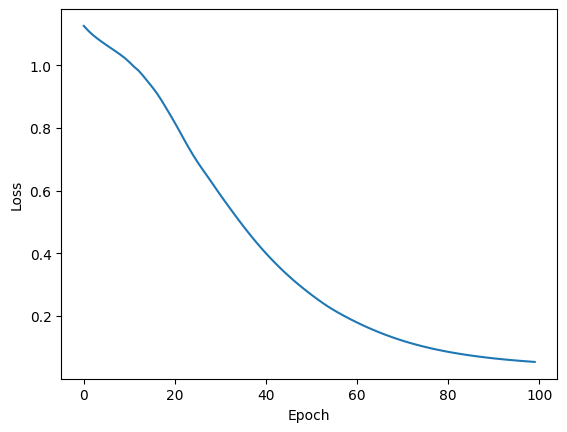

In [21]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [22]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically this is used to turn off backpropagation
  y_eval = model.forward(X_test) # y_eval is the prediction
  loss = criterion(y_eval, y_test)


In [23]:

loss

tensor(0.1315)

In [24]:
# Check accuracy (how many predictions are correct)
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1:2}. {str(y_val):38} {y_test[i]} {y_val.argmax().item()}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')



# In simple words:

# Turn off training mode.

# Ask the model to predict on test data.

# Compare predictions with real answers.

# Count how many the model got right.

# Show accuracy in percentage. ✅

 1. tensor([-5.8760,  4.4628,  6.5124])    2 2
 2. tensor([-7.5436,  4.1670,  9.7255])    2 2
 3. tensor([-8.4504,  5.1271, 10.1987])    2 2
 4. tensor([-4.3398,  5.6267,  2.5608])    1 1
 5. tensor([-7.1825,  4.8754,  8.2992])    2 2
 6. tensor([-3.3974,  5.3463,  1.2803])    1 1
 7. tensor([-5.9231,  4.9822,  5.9997])    2 2
 8. tensor([-4.2881,  5.7003,  2.3889])    1 1
 9. tensor([-6.5356,  4.9257,  7.1260])    2 2
10. tensor([-8.0509,  4.4129, 10.3286])    2 2
11. tensor([-5.6762,  4.9500,  5.6215])    2 2
12. tensor([ 4.5662, -2.2476, -2.8911])    0 0
13. tensor([ 4.2571, -1.9967, -2.7330])    0 0
14. tensor([-2.1108,  4.0515,  0.5799])    1 1
15. tensor([ 3.4575, -1.2098, -2.3514])    0 0
16. tensor([-5.4724,  5.1165,  5.0934])    2 1
17. tensor([ 4.0557, -1.7949, -2.6492])    0 0
18. tensor([-5.8075,  4.6053,  6.2458])    1 2
19. tensor([ 4.4343, -2.1392, -2.8242])    0 0
20. tensor([ 3.4528, -1.2514, -2.3660])    0 0
21. tensor([-2.6189,  4.5619,  0.8574])    1 1
22. tensor([-

In [25]:
# Evaluate New Data on the Network

In [26]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [27]:
with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([ 4.5365, -2.2383, -2.8684])
0


In [28]:
newer_iris = torch.tensor([5.1,	3.5,	1.4,	0.2])


In [29]:
with torch.no_grad():
  print(model.forward(newer_iris))
  print(model.forward(newer_iris).argmax().item())

tensor([ 4.7974, -2.4588, -2.9975])
0


In [31]:
# Save and Load our Neural Network Model
torch.save(model.state_dict(), 'my_iris_model.pt')

In [32]:
# Load the Save Model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [33]:
# Make Sure it loaded successfully
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)